Author: Ankur Wasnik<br>
Code : Jan251546

In [1]:
%config Completer.use_jedi = False

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


# Reading data [

In [3]:
raw_titanic = pd.read_csv('./titanic.csv')
print(raw_titanic.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [4]:
print(raw_titanic.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [5]:
new_columns = ['Survived' , 'PassengerClass' ,'Name','Gender','Age','Siblings_onBoard','Relatives_onBoard','Fare']
raw_titanic.columns = new_columns
print(raw_titanic.head())

   Survived  PassengerClass  \
0         0               3   
1         1               1   
2         1               3   
3         1               1   
4         0               3   

                                                Name  Gender   Age  \
0                             Mr. Owen Harris Braund    male  22.0   
1  Mrs. John Bradley (Florence Briggs Thayer) Cum...  female  38.0   
2                              Miss. Laina Heikkinen  female  26.0   
3        Mrs. Jacques Heath (Lily May Peel) Futrelle  female  35.0   
4                            Mr. William Henry Allen    male  35.0   

   Siblings_onBoard  Relatives_onBoard     Fare  
0                 1                  0   7.2500  
1                 1                  0  71.2833  
2                 0                  0   7.9250  
3                 1                  0  53.1000  
4                 0                  0   8.0500  


# Preprocessing Data

In [6]:
np.corrcoef(raw_titanic['PassengerClass'] , raw_titanic['Fare'])

array([[ 1.        , -0.54891936],
       [-0.54891936,  1.        ]])

Note: -0.5489 is correlation coefficient so , they are correlated in sense that Passenger class 1 have largest fare

In [7]:
#dropping Name , Fare 
df_droppedColumns = raw_titanic.drop(['Name' , 'Fare'],axis=1)

In [8]:
def agePreprocessing(df_age):
    new_age=[]
    for x in df_age:
        if x>=0 and x<=18 :
            new_age.append(0)
            continue
        elif x>18 and x<=65 :
            new_age.append(1)
            continue
        elif x>65 :
            new_age.append(2)
    return pd.Series(new_age)

In [9]:
df_droppedColumns['Age'] = agePreprocessing(df_droppedColumns['Age'])
print(df_droppedColumns['Age'])

0      1
1      1
2      1
3      1
4      1
      ..
882    1
883    1
884    0
885    1
886    1
Name: Age, Length: 887, dtype: int64


Age Reference :<br>
<li>0-> child
<li>1-> not elders
<li>2-> old aged people


In [10]:
df_droppedColumns['Gender']=df_droppedColumns['Gender'].map({'male':0 , 'female':1})
print(df_droppedColumns['Gender'])

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    1
885    0
886    0
Name: Gender, Length: 887, dtype: int64


Note:<br>
<li> 0 -> Male
<li> 1 -> female

In [11]:
print(df_droppedColumns)

     Survived  PassengerClass  Gender  Age  Siblings_onBoard  \
0           0               3       0    1                 1   
1           1               1       1    1                 1   
2           1               3       1    1                 0   
3           1               1       1    1                 1   
4           0               3       0    1                 0   
..        ...             ...     ...  ...               ...   
882         0               2       0    1                 0   
883         1               1       1    1                 0   
884         0               3       1    0                 1   
885         1               1       0    1                 0   
886         0               3       0    1                 0   

     Relatives_onBoard  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
882                  0  
883                  0  
884   

In [12]:
targets = df_droppedColumns['Survived']
features = df_droppedColumns.iloc[:,1:]

In [13]:
print(features.head())

   PassengerClass  Gender  Age  Siblings_onBoard  Relatives_onBoard
0               3       0    1                 1                  0
1               1       1    1                 1                  0
2               3       1    1                 0                  0
3               1       1    1                 1                  0
4               3       0    1                 0                  0


In [14]:
print(targets.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


# DecisionTreeClassifier
<strong>Gini</strong> and <strong>entropy</strong> functions are used as Impurity function<br>


In [15]:
dtc_gini= DecisionTreeClassifier(criterion='gini',random_state=49)
dtc_entropy = DecisionTreeClassifier(criterion='entropy' , random_state=49)

# Splitting data into Training and testing 

In [16]:
from sklearn.model_selection  import train_test_split
X_train,X_test,ytrain,ytest = train_test_split(features,targets,test_size=0.3)

# Training classifier

In [17]:
dtc_entropy.fit(X_train,ytrain)
dtc_gini.fit(X_train,ytrain)

DecisionTreeClassifier(random_state=49)

# Predictions of unseen data(test dataset)

In [18]:
dtc_entropy_preds = dtc_entropy.predict(X_test)
print('Entrophy accuracy:',accuracy_score(dtc_entropy_preds,ytest))

Entrophy accuracy: 0.7602996254681648


In [19]:
dtc_gini_preds = dtc_gini.predict(X_test)
print('Gini accuracy:',accuracy_score(dtc_gini_preds,ytest))

Gini accuracy: 0.7602996254681648


# Visualizing Trees

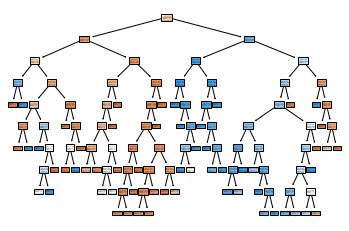

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(dtc_entropy,filled=True)
plt.show()

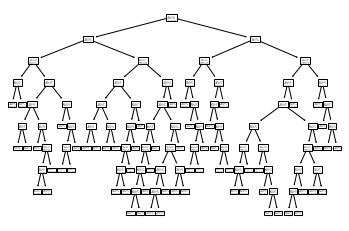

In [23]:
tree.plot_tree(dtc_gini)
plt.show()